In [2]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import mlem

In [3]:
#IMPORTO DATAFRAME
df_house = pd.read_csv('https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/formart_house.csv')
df_house

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [4]:
#RINOMINO LA COLONNA MEDV : PRICE
df_house.rename(columns={"medv":"price"}, inplace=True)
df_house

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [5]:
#EDA 
df_house.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,507,507,507,507,507,507,507,507,507,507,507,507,507,507
unique,505,27,77,3,82,447,357,413,10,67,47,358,456,230
top,0.01501,0.0,18.1,0,0.538,5.713,100.0,3.4952,24,666,20.2,396.9,7.79,50.0
freq,2,372,132,471,23,3,43,5,132,132,140,121,3,16


In [6]:
#EDA 
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crim     507 non-null    object
 1   zn       507 non-null    object
 2   indus    507 non-null    object
 3   chas     507 non-null    object
 4   nox      507 non-null    object
 5   rm       507 non-null    object
 6   age      507 non-null    object
 7   dis      507 non-null    object
 8   rad      507 non-null    object
 9   tax      507 non-null    object
 10  ptratio  507 non-null    object
 11  b        507 non-null    object
 12  lstat    507 non-null    object
 13  price    507 non-null    object
dtypes: object(14)
memory usage: 55.6+ KB


In [7]:
#drop this is not rocket science...for you!
df_house.drop(df_house.tail(1).index,inplace=True)
df_house

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
#convertire tutto in float
s = df_house.select_dtypes(include='object').columns
df_house[s] = df_house[s].astype("float")
df_house

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
df_house.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
for col in df_house.columns:
    print(col)

crim
zn
indus
chas
nox
rm
age
dis
rad
tax
ptratio
b
lstat
price


In [12]:

mean=df_house.mean()
# mean.columns = ["data","value"]
mean


crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
b          356.674032
lstat       12.653063
price       22.532806
dtype: float64

<Axes: >

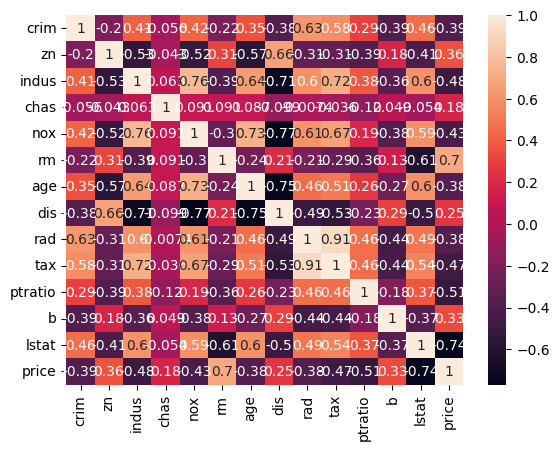

In [13]:
df_house.corr()
sns.heatmap(data=df_house.corr(),annot=True)

In [14]:
#IDENTIFICO FEATURES E TARGET
y = df_house["price"] #target y = dataframe [colonna profit]
X = df_house.drop("price",axis=1) #features X = dataframe meno la colonna profit

In [15]:
#SPLIT DATAFRAME PER CALCOLARE IL MODELLO E POI TESTARLO
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, # Percentuale del test (0,20%)
                                                    random_state = 555 #seed per numero random (può essere qualunque numero), serve per evitare bias sul modello
                                                    )

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('R2_score: ', r2score)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2_score:  0.769356306105142
MAE:  3.1951952845247984
MSE:  18.172583350989512
RMSE:  4.262931309672901


In [20]:
mlem.api.save(model,
              'model_', # model_.mlem
              sample_data = X_train #features
              )

MlemModel(location=Location(path='c:/Users/libero.bo/Desktop/Corso/BACKEND/Learning/grotti/sommativa/model_.mlem', project=None, rev=None, uri='file://c:/Users/libero.bo/Desktop/Corso/BACKEND/Learning/grotti/sommativa/model_.mlem', project_uri=None, fs=<fsspec.implementations.local.LocalFileSystem object at 0x000001E096911480>), params={}, artifacts={'data': LocalArtifact(uri='model_', size=782, hash='fe28a164ddaff02dfa625adaf9befaee')}, requirements=Requirements(__root__=[InstallableRequirement(module='sklearn', version='1.2.2', package_name='scikit-learn', extra_index=None, source_url=None, vcs=None, vcs_commit=None), InstallableRequirement(module='pandas', version='1.5.3', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None), InstallableRequirement(module='numpy', version='1.24.2', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None)]), processors_cache={'model': SklearnModel(model=LinearRegression(), io=SimplePickleIO(), metho

In [21]:
model.coef_

array([-1.11853298e-01,  4.00876006e-02,  6.12974848e-03,  2.79375880e+00,
       -1.44930498e+01,  4.12418215e+00,  3.65924814e-03, -1.37690283e+00,
        2.97481082e-01, -1.17787443e-02, -9.37446526e-01,  8.85523575e-03,
       -5.35406615e-01])

In [22]:
model.intercept_

32.44250348473052

In [23]:
y_pred = model.predict(X_test)

In [24]:
res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
res_df

,predicted,real
0,20.684895,16.2
1,28.213624,23.9
2,20.495960,19.3
3,43.125332,50.0
4,5.869058,13.8
...,...,...
97,28.480020,23.3
98,13.112161,10.5
99,35.352539,50.0
100,22.951910,19.8


In [25]:
res_df['error'] = res_df['real'] - res_df['predicted']
res_df

,predicted,real,error
0,20.684895,16.2,-4.484895
1,28.213624,23.9,-4.313624
2,20.495960,19.3,-1.195960
3,43.125332,50.0,6.874668
4,5.869058,13.8,7.930942
...,...,...,...
97,28.480020,23.3,-5.180020
98,13.112161,10.5,-2.612161
99,35.352539,50.0,14.647461
100,22.951910,19.8,-3.151910


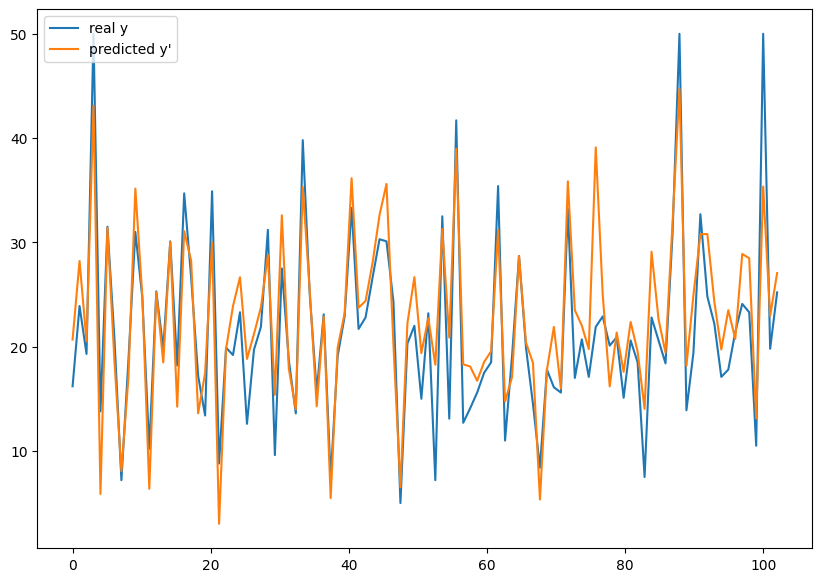

In [26]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(10,7))
plt.plot(x, y_test, label='real y')
plt.plot(x, y_pred, label="predicted y'")
plt.legend(loc=2);

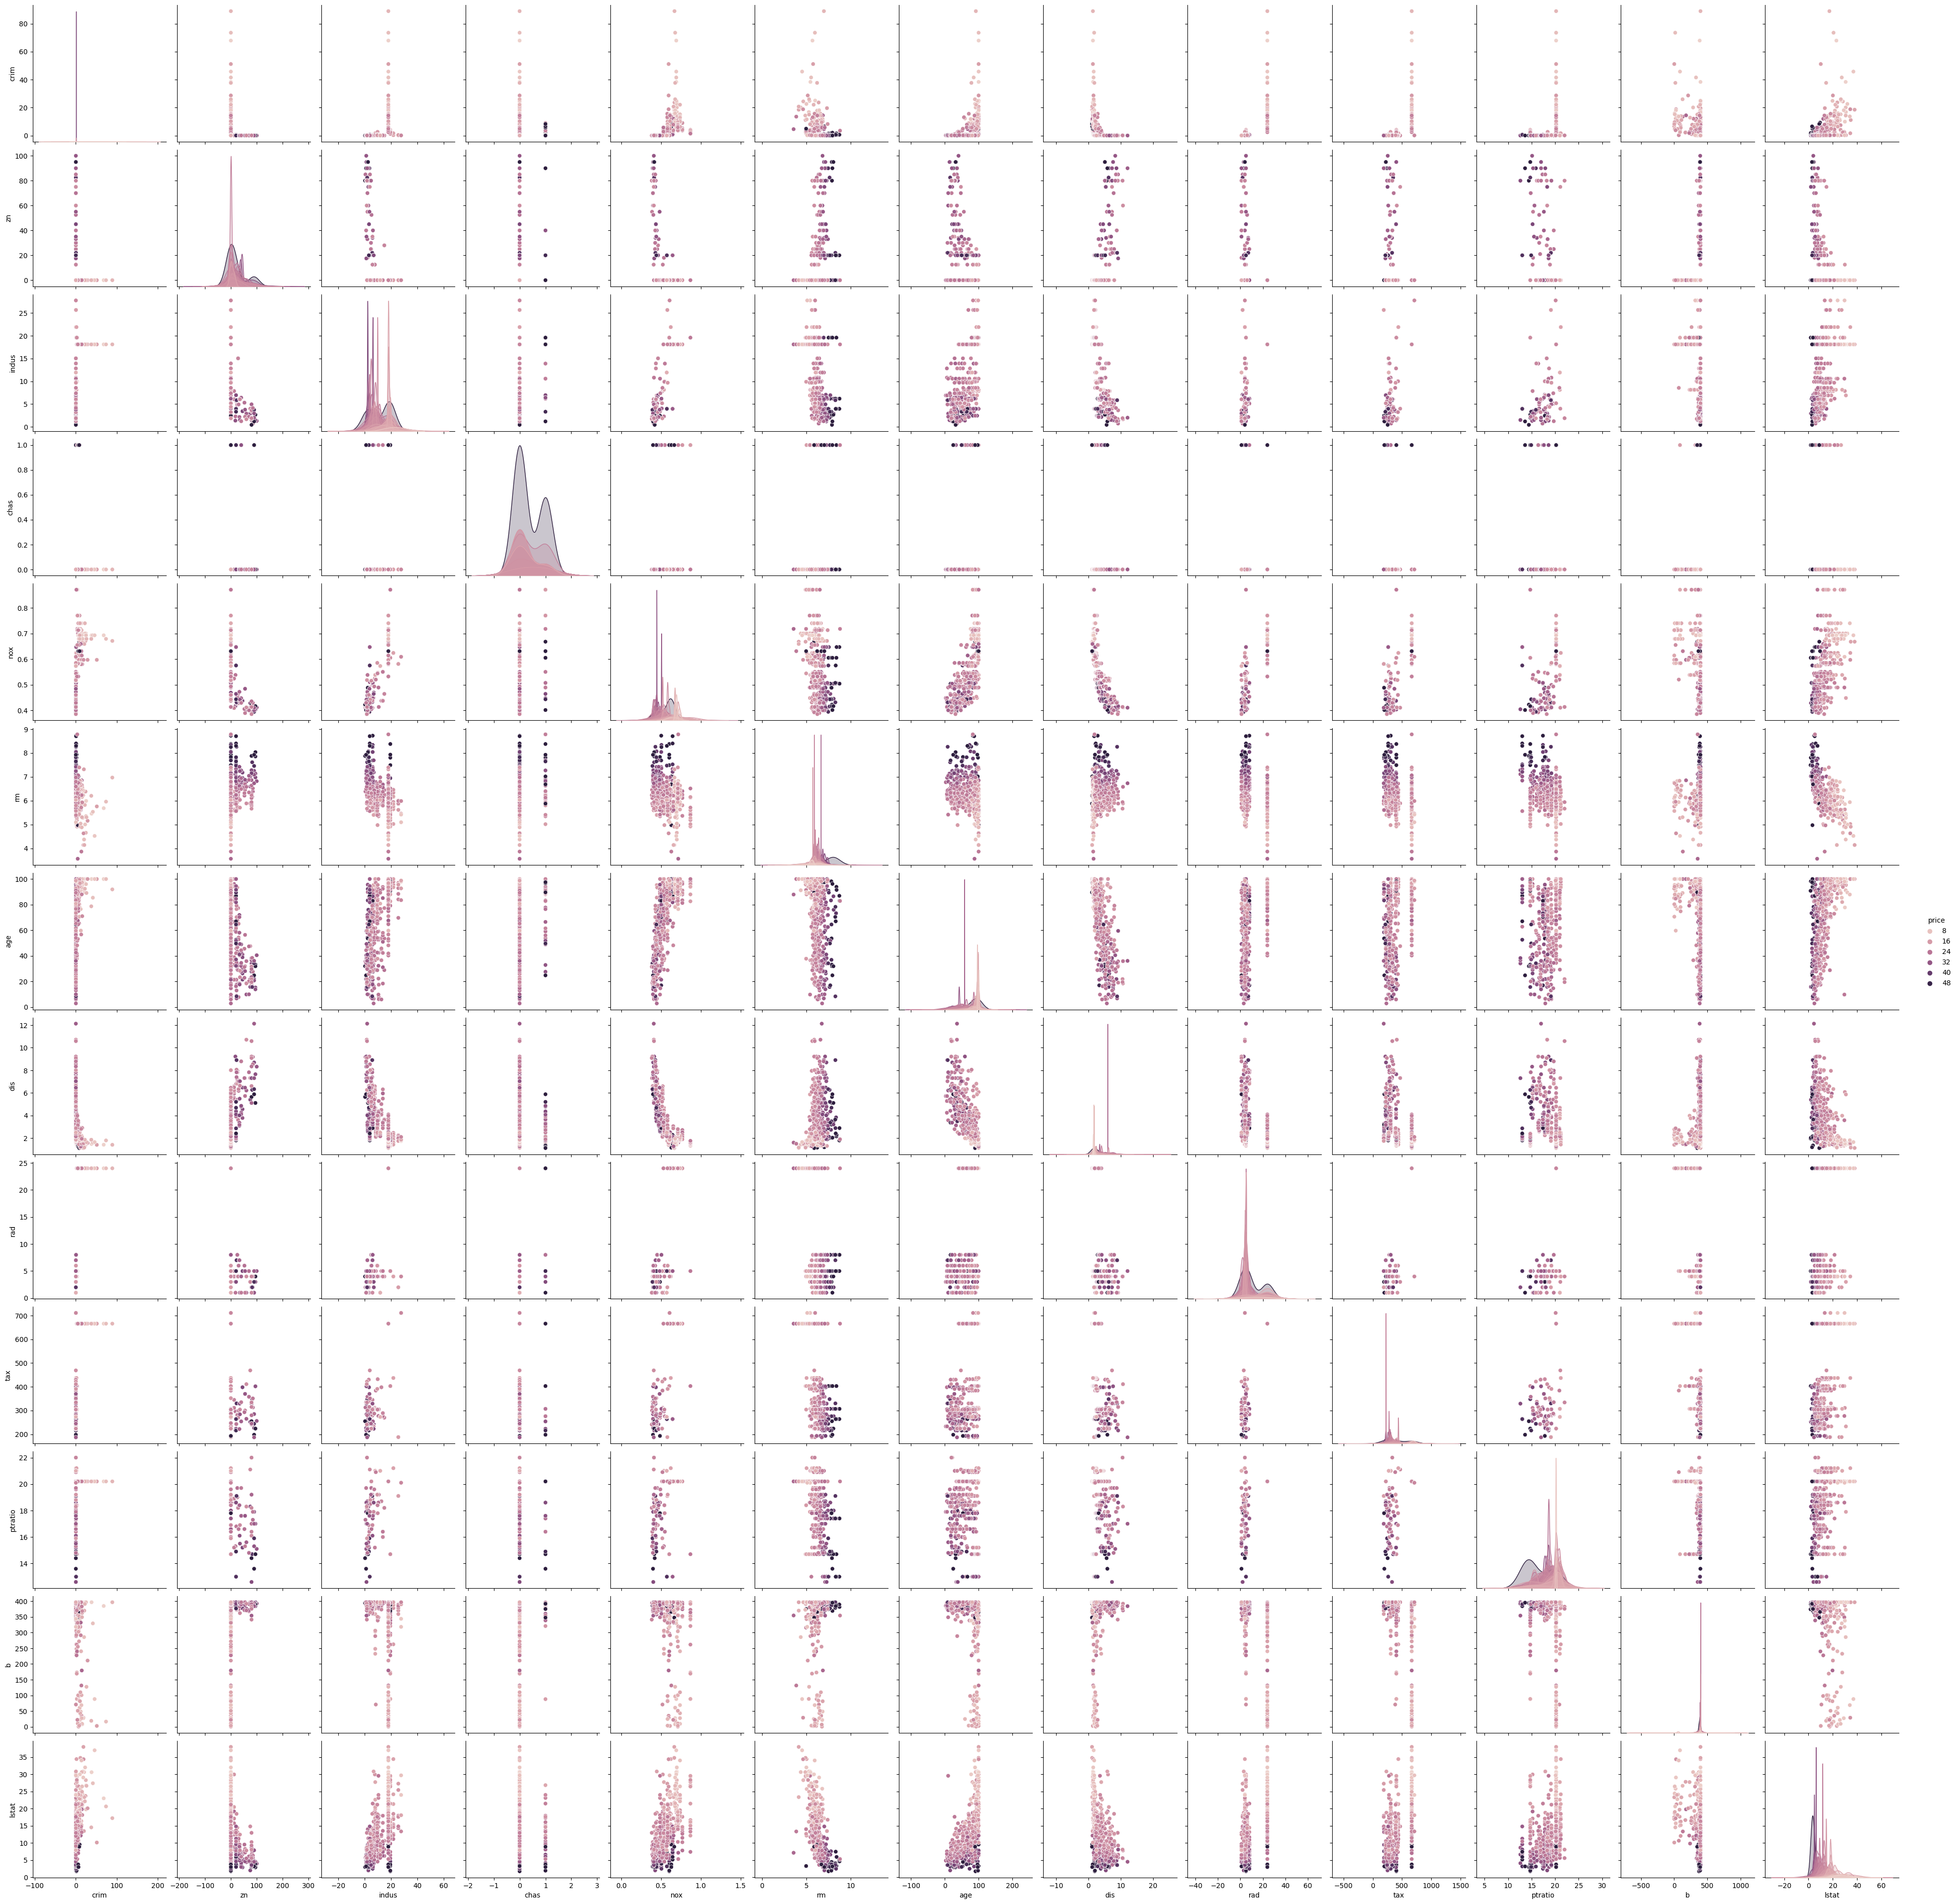

In [30]:
sns.pairplot(df_house,hue='price',height=3, aspect=1)